<a href="https://colab.research.google.com/github/AndreaOgoke/AndreaOgoke/blob/main/Copy_of_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By : Andrea**

**The World Happiness Report: An Exploratory Data Analysis Project**

**Introduction**

As nations evolve, questions about how happy people are now. Were people more happier in the past? How satisfied are people in different societies? And what are the underlying factors that affect peoples happiness? While these questions appear difficult to answer; they are questions that undoubtedly matter for each of us personally given the uniqueness of every country and region. Indeed, today, life satisfaction and happiness are central research areas in the social sciences, including in ‘mainstream’ economics. Social scientists often recommend that measures of subjective well-being should augment the usual measures of economic prosperity, such as GDP per capita. But how can happiness be measured? Are there reliable comparisons of happiness across time and space that can give us clues regarding what makes people declare themselves ‘happy’? "In 2012 the first iteration of the World Happiness Report was produced, a survey that looks at nationally representative happiness levels across countries as a measure of national progress. It was an impressive feat that required the contributions of leading experts in fields such as statistics, data science, economics, health, psychology and public policy, among many others. To evaluate happiness levels, the report used surveys provided by the Gallup World Poll, the gold standard of worldwide polling. More specifically, happiness scores are based on the Cantril Ladder, a subjective metric that asks each participant to evaluate his or her quality of life on a scale from 0 to 10, with 10 being the dream life." Since 2012 a newly updated report has been published each year excluding 2014, and in this project, we will look specifically at the year 2015.


**CREDITS**

The data from the World Happiness Report was borrowed from a reviewed Kaggle Kernel of the same name. Although this dataset is relatively clean in isolation, once merged with the second dataset of this project (world map data), further cleaning will be necessary.

**THE GOAL**

To look for reliable comparisons of happiness across regions that can give us clues regarding what makes people happy.

**CONTINIOUS ANALYSIS AND RESEARCH**



In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats.morestats import Mean
%matplotlib inline

happiness_data = pd.read_excel("/Happiness Data 2015 (Kaggle).xlsx")
def happiness_score():
  happiness_data = pd.read_excel("/Happiness Data 2015 (Kaggle).xlsx")
  display(happiness_data)
  
happiness_score()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


I will be describing the dataset, to see if there's any null value and to also check I have the correct datatypes. 


In [ ]:
def describe_happiness_data():
  print(happiness_data.info())
describe_happiness_data()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

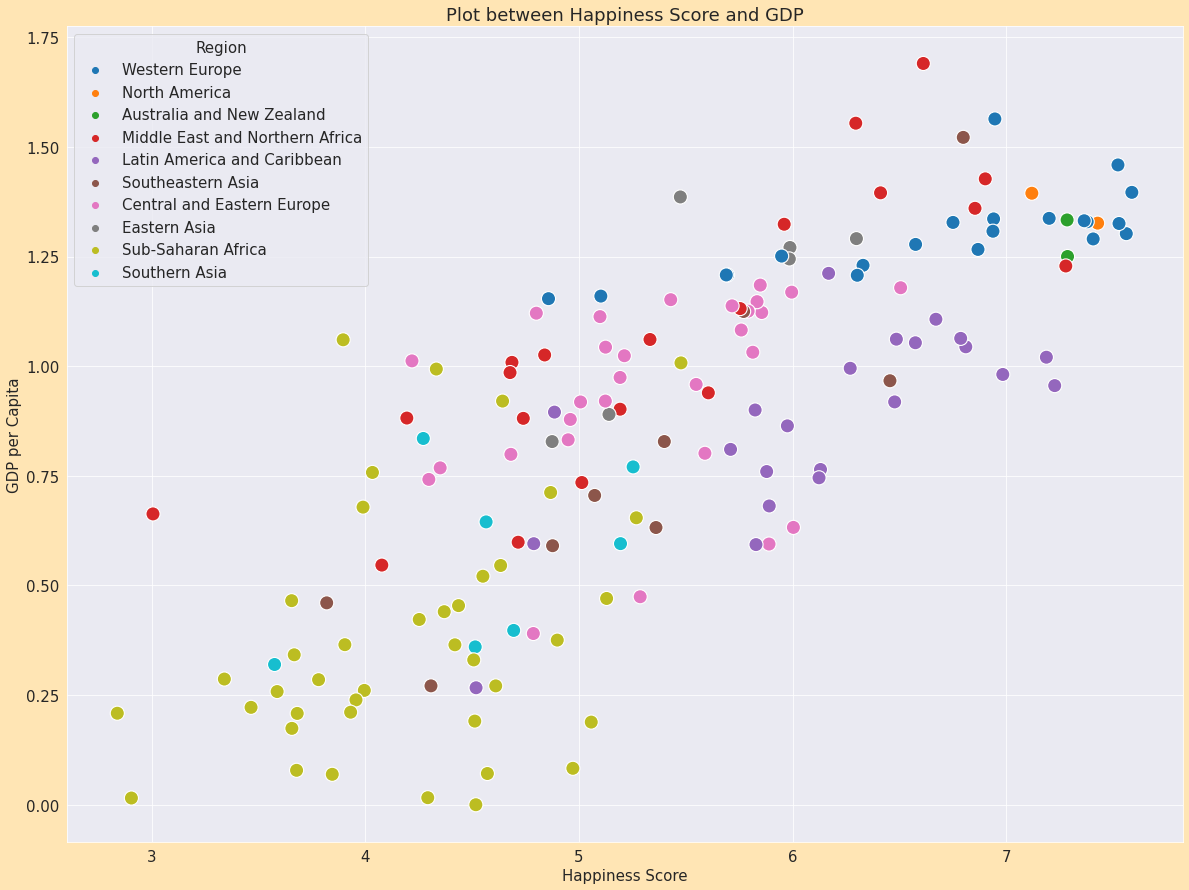

In [ ]:
def happ_gdp():

  sns.set_style('darkgrid')
  plt.rcParams['font.size'] =15
  plt.rcParams['figure.figsize'] =(20,15)
  plt.rcParams['figure.facecolor'] = '#FFE5B4'
  plt.title('Plot between Happiness Score and GDP')
  x = happiness_data['Happiness Score']
  y = happiness_data['Economy (GDP per Capita)']
  sns.scatterplot(x=x,y=y,hue = happiness_data.Region , s = 200)
  plt.xlabel('Happiness Score')
  plt.ylabel('GDP per Capita')

happ_gdp()

Check GDP by Region

In [ ]:

gdp_region = happiness_data.groupby('Region')[['Economy (GDP per Capita)']].sum()
gdp_region


,Economy (GDP per Capita)
Region,
Australia and New Zealand,2.58376
Central and Eastern Europe,27.33071
Eastern Asia,6.91068
Latin America and Caribbean,19.28994
Middle East and Northern Africa,21.33947
North America,2.72080
Southeastern Asia,7.10149
Southern Asia,3.92340
Sub-Saharan Africa,15.21892


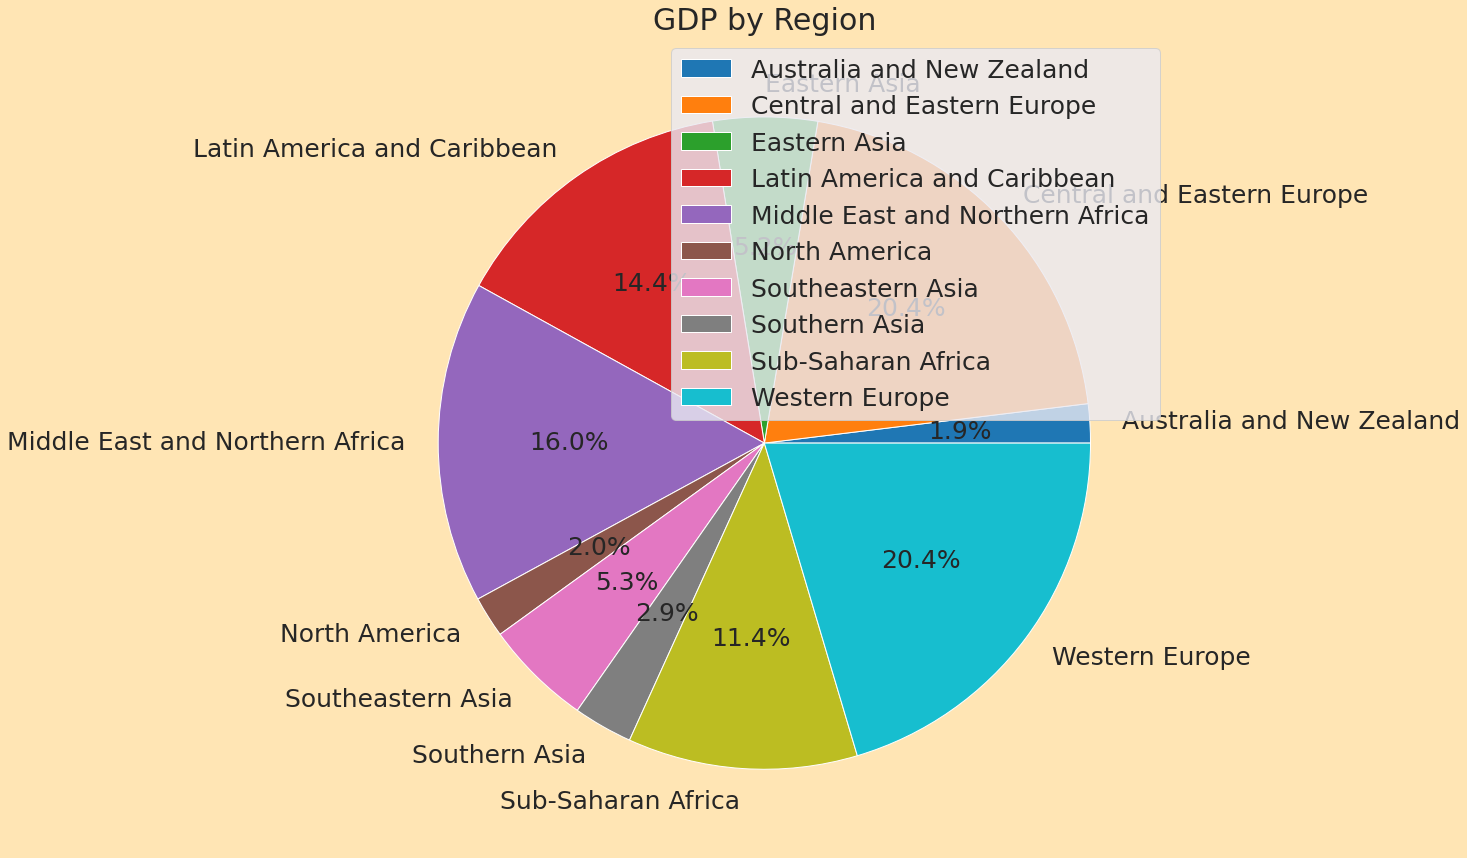

In [ ]:
def gdp_pie():
  gdp_region.plot.pie(y=0,autopct ='%1.1f%%',figsize=(20,15))
  plt.title('GDP by Region')
  plt.ylabel('')
gdp_pie()

Total number of countries in each region.

In [ ]:
total_country = happiness_data.groupby('Region')[['Country']].count()
total_country

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20
North America,2
Southeastern Asia,9
Southern Asia,7
Sub-Saharan Africa,40


Creating a correlation map

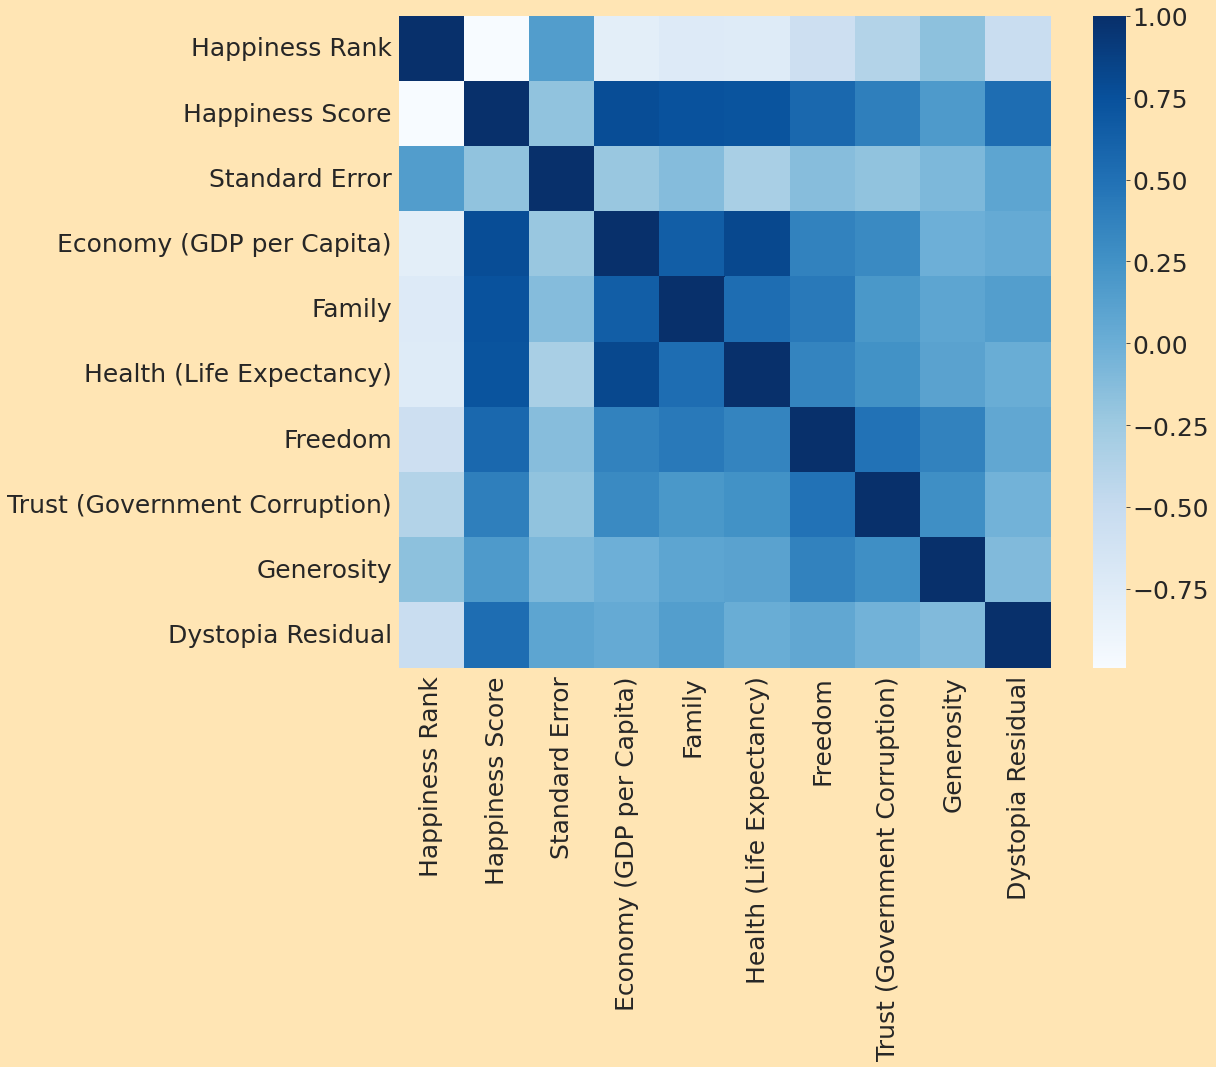

In [ ]:
def corr_happ():
  correlation = happiness_data.corr(method = "pearson")
  f, ax = plt.subplots(figsize =(15,12))
  sns.heatmap(correlation,cmap="Blues", square=True, ax=ax)
  plt.rcParams['font.size'] =25

corr_happ()

Check for the level of trust in government.


In [ ]:

corruption = happiness_data.groupby('Region')[['Trust (Government Corruption)']].mean()
corruption


,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


Text(0, 0.5, 'Corruption Index')

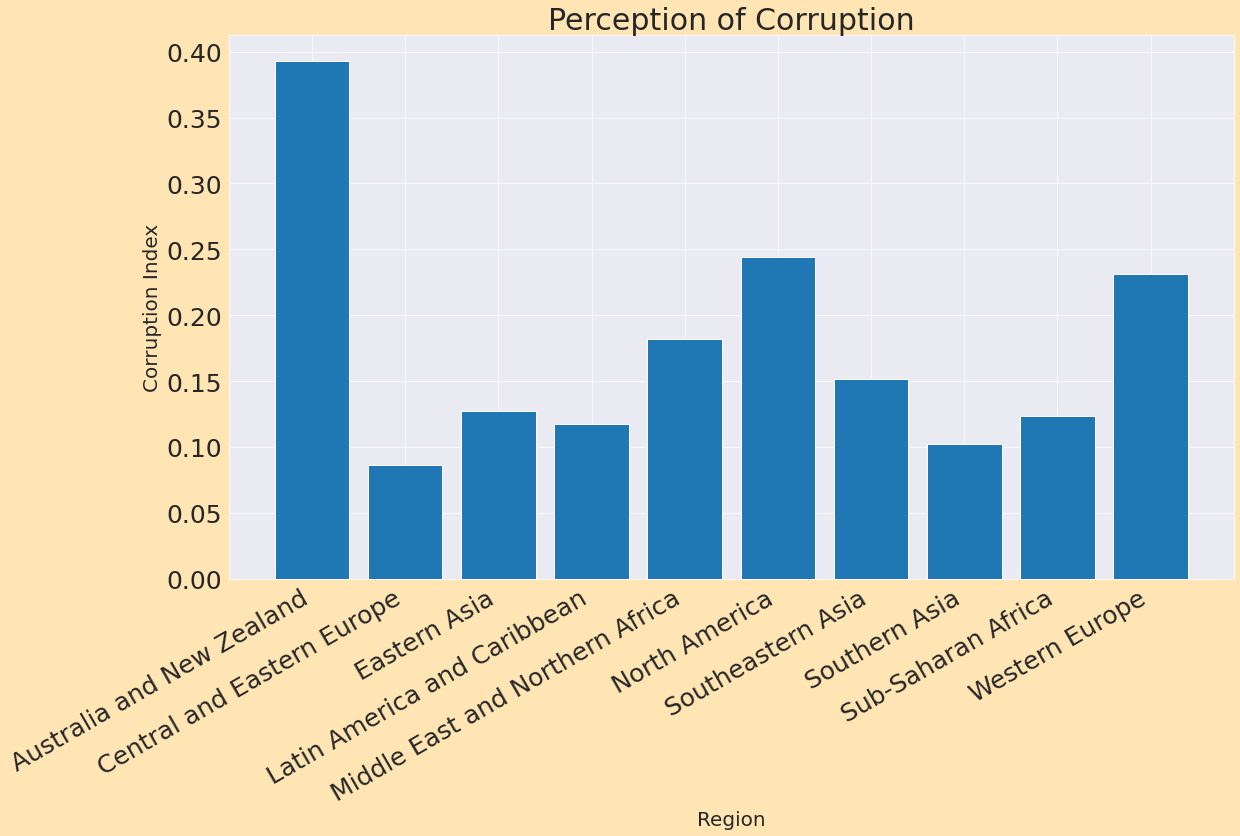

In [ ]:
def bar_plot_pc():
  plt.rcParams['figure.figsize'] =(18,10)
  plt.title('Perception of Corruption')
  plt.bar(corruption.index,corruption['Trust (Government Corruption)'])
  plt.xticks(rotation=30, ha = 'right')
  plt.xlabel('Region', fontsize = 20)
  plt.ylabel('Corruption Index', fontsize = 20)

bar_plot_pc()
